In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [3]:
start = '2010-01-01'
end = '2024-12-31'

df = yf.download('AAPL',start,end, auto_adjust= True)

if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.droplevel(1)

df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,6.431896,6.446622,6.382907,6.414464,493729600
2010-01-05,6.443018,6.479384,6.409056,6.449630,601904800
2010-01-06,6.340531,6.468562,6.333919,6.443016,552160000
2010-01-07,6.328811,6.371488,6.282828,6.363974,477131200
2010-01-08,6.370886,6.371488,6.283129,6.320395,447610800


In [4]:
df.tail()

Price,Close,High,Low,Open,Volume
Date,,,,,
2024-12-23,254.655716,255.034791,252.840088,254.156919,40858800
2024-12-24,257.578674,257.588630,254.675658,254.875189,23234700
2024-12-26,258.396667,259.474086,257.010028,257.568678,27237100
2024-12-27,254.974930,258.077462,252.451019,257.209530,42355300
2024-12-30,251.593079,252.889953,250.146571,251.623005,35557500


In [5]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
0,2010-01-04,6.431896,6.446622,6.382907,6.414464,493729600
1,2010-01-05,6.443018,6.479384,6.409056,6.449630,601904800
2,2010-01-06,6.340531,6.468562,6.333919,6.443016,552160000
3,2010-01-07,6.328811,6.371488,6.282828,6.363974,477131200
4,2010-01-08,6.370886,6.371488,6.283129,6.320395,447610800


In [6]:
df = df.drop(['Date'],axis =1)
df.columns.name = None
df.head()

,Close,High,Low,Open,Volume
0,6.431896,6.446622,6.382907,6.414464,493729600
1,6.443018,6.479384,6.409056,6.449630,601904800
2,6.340531,6.468562,6.333919,6.443016,552160000
3,6.328811,6.371488,6.282828,6.363974,477131200
4,6.370886,6.371488,6.283129,6.320395,447610800


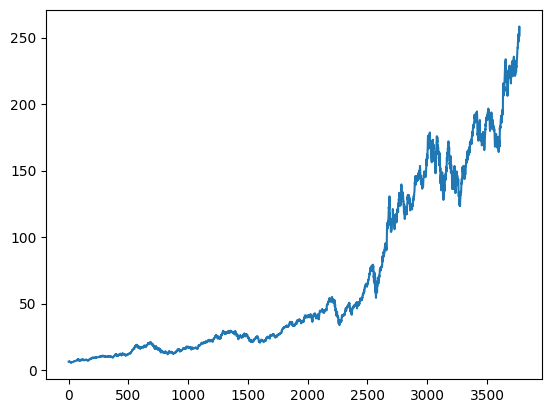

In [7]:
plt.plot(df.Close)

In [8]:
df

,Close,High,Low,Open,Volume
0,6.431896,6.446622,6.382907,6.414464,493729600
1,6.443018,6.479384,6.409056,6.449630,601904800
2,6.340531,6.468562,6.333919,6.443016,552160000
3,6.328811,6.371488,6.282828,6.363974,477131200
4,6.370886,6.371488,6.283129,6.320395,447610800
...,...,...,...,...,...
3768,254.655716,255.034791,252.840088,254.156919,40858800
3769,257.578674,257.588630,254.675658,254.875189,23234700
3770,258.396667,259.474086,257.010028,257.568678,27237100
3771,254.974930,258.077462,252.451019,257.209530,42355300


In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3768,228.669739
3769,229.057160
3770,229.558168
3771,230.045264


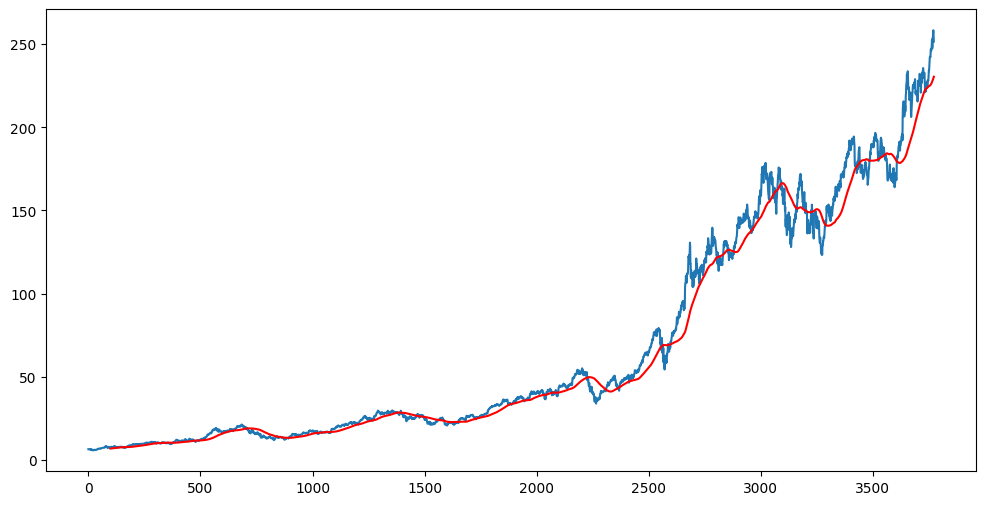

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'red')

In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3768,210.476669
3769,210.905998
3770,211.337030
3771,211.761392


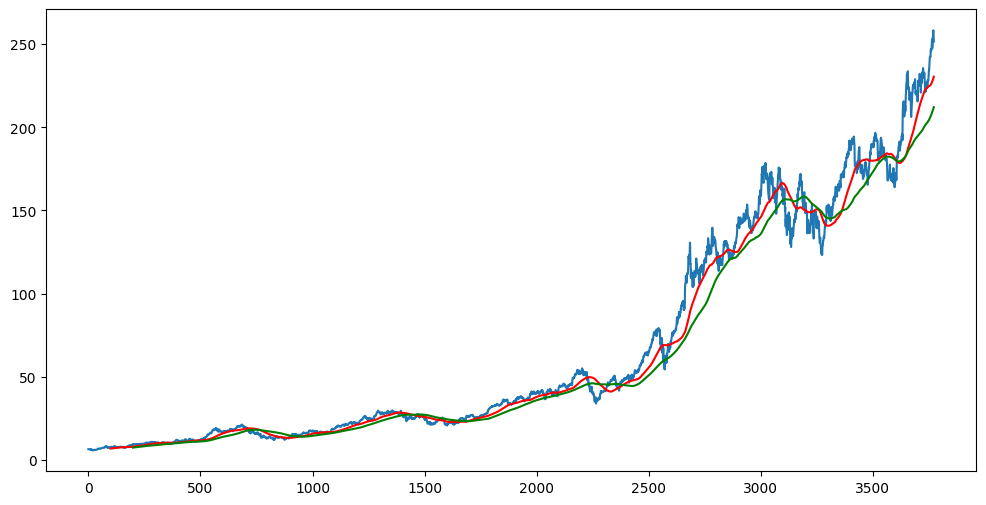

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'red')
plt.plot(ma200, 'green')

In [13]:
df.shape

(3773, 5)

Splitting data in Training and Testing

In [14]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2641, 1)
(1132, 1)


In [15]:
data_training.head()

,Close
0,6.431896
1,6.443018
2,6.340531
3,6.328811
4,6.370886


In [16]:
data_testing.head()

,Close
2641,88.485016
2642,88.485016
2643,90.851990
2644,90.570107
2645,92.679489


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [18]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00792291],
       [0.00805643],
       [0.00682612],
       ...,
       [0.9623663 ],
       [0.98614282],
       [0.99495295]])

In [19]:
data_training_array.shape

(2641, 1)

In [20]:
x_train = []
y_train =[]

for i in range(100 , data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train) , np.array(y_train)

In [21]:
x_train.shape

(2541, 100, 1)

ML MODEL

In [23]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [24]:
model = Sequential()
model.add(LSTM(50,activation ='relu',return_sequences= True, input_shape = (x_train.shape[1],1))) #input_shape =(shape,1) , here 1 because we are working with closing columm
model.add(Dropout(0.2))

model.add(LSTM(60,activation ='relu',return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(80,activation ='relu',return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(120,activation ='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer='adam', loss ='mean_squared_error')
model.fit(x_train,y_train, epochs =50)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 27s 260ms/step - loss: 0.0014
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 256ms/step - loss: 0.0016
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 260ms/step - loss: 0.0013
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 263ms/step - loss: 0.0013
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 260ms/step - loss: 0.0015
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 40s 246ms/step - loss: 0.0013
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 22s 261ms/step - loss: 0.0016
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 40s 247ms/step - loss: 0.0016
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 22s 261ms/step - loss: 0.0016
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 40s 247ms/step - loss: 0.0016
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 261ms/step - loss: 0.0012
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 40s 245ms/step - loss: 0.0014
Epoch 13/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 22s 276ms/step - loss: 0.0014
Epoch 14/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 39s 250ms/step - loss: 0.0013
Epoch 15/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 

In [36]:
model.save('keras_model.h5')

In [37]:
past_100_days = data_training.tail(100)

In [38]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [39]:
final_df.head()

,Close
0,77.562843
1,77.931244
2,77.461052
3,79.300598
4,78.735893


In [40]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.11363823],
       [0.11544396],
       [0.1131393 ],
       ...,
       [1.        ],
       [0.98322826],
       [0.96665203]])

In [43]:
input_data.shape

(1232, 1)

In [49]:
x_test = []
y_test =[]

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [60]:
x_test.shape, y_test.shape

((1132, 100, 1), (1132,))

In [52]:
x_test,y_test =np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1132, 100, 1)
(1132,)


Making Predictions

In [53]:
y_predicted = model.predict(x_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step


In [54]:
y_predicted.shape

(1132, 1)

In [55]:
y_test

array([0.16717355, 0.16717355, 0.17877533, ..., 1.        , 0.98322826,
       0.96665203])

In [56]:
y_predicted

array([[0.22303532],
       [0.22413056],
       [0.22505823],
       ...,
       [0.90773046],
       [0.91051793],
       [0.91246176]], dtype=float32)

In [57]:
scaler.scale_
#This will give the factor by which all these values were scaled down

array([0.00490153])

In [58]:
scale_factor = 1/0.00490153
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

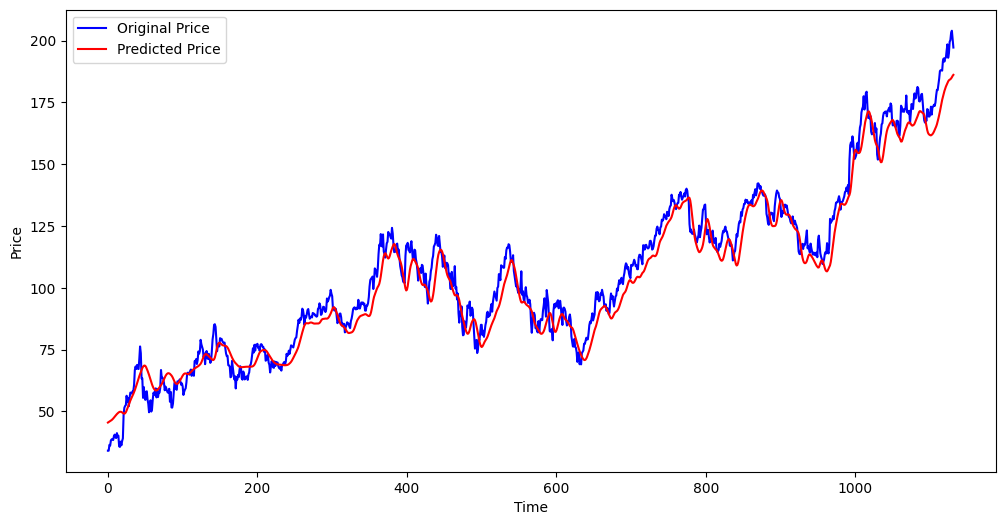

In [59]:
plt.figure(figsize = (12,6))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_predicted,'r',label ='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()